## **Author: Asad Tariq Sheikh**

## **Task: Predictive Analysis on Movie Rating**

(Level - Beginner)

Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.

The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

Dataset: https://raw.githubusercontent.com/asadsheikh1/MachineLearningPredictions/main/IMDb%20Movies%20India.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pd.set_option('display.max_rows', None)

# **Importing CSV**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/asadsheikh1/MachineLearningPredictions/main/IMDb%20Movies%20India.csv', encoding='latin-1')

# **Reading CSV**

In [4]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# **Analyzing Data**

In [5]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
data.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## **Checking null values**

In [9]:
(data.isnull().sum() / len(data)).sort_values(ascending=False) * 100

Duration    53.317429
Rating      48.939326
Votes       48.932878
Actor 3     20.272100
Actor 2     15.371720
Genre       12.102650
Actor 1     10.426204
Year         3.404475
Director     3.385131
Name         0.000000
dtype: float64

<Axes: >

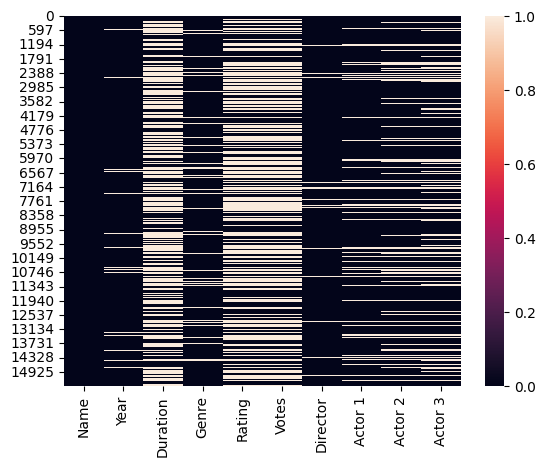

In [10]:
sns.heatmap(data.isnull())

# **Dropping all the null rows**

In [11]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


**Selecting all rows where all values in the specified columns `data.iloc[:, 1:9]` are `NaN`.**

In [12]:
null_rows = data[data.iloc[:, 1:9].isnull().all(axis=1)]
null_rows

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4271,Durga Rani Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8669,Main Hoon Kaun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9600,Mughal Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Drop rows from `data` that match the rows in `null_rows`**

In [13]:
data = data.drop(null_rows.index)

**Now, we've dropped the rows from the `data` that have the same indices as the rows in the `null_rows` DataFrame, effectively removing all rows with all NaN values for the specified columns.**

In [14]:
null_rows = data[data.iloc[:, 1:9].isnull().all(axis=1)]
null_rows

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15501 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15501 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [16]:
for column in data.select_dtypes(include='object'):
    print(f'Name of column: {column}')
    print(data[column].unique())
    print('-' * 100)

Name of column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']
----------------------------------------------------------------------------------------------------
Name of column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)'

# **Dropping all the null values**

In [17]:
data.dropna(inplace=True)

In [18]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [19]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


# **Data Cleaning**

In [20]:
data["Name"] = data["Name"].str.replace(r'[.,!?;%@#:()\-1234567890]', '', regex=True).str.strip()
data["Name"]

1        Gadhvi He thought he was Gandhi
3                                 Yaaram
5                      Aur Pyaar Ho Gaya
6                                 Yahaan
8                        A Question Mark
                      ...               
15493                             Zubaan
15494                           Zubeidaa
15503                    Zulm Ki Zanjeer
15505                              Zulmi
15508                         ZulmOSitam
Name: Name, Length: 5659, dtype: object

In [21]:
data['Year'] = data['Year'].str.replace(r'[^0-9]', '').astype(int)
data['Year']

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15493    2015
15494    2001
15503    1989
15505    1999
15508    1998
Name: Year, Length: 5659, dtype: int64

In [22]:
data['Duration'] = data['Duration'].str.replace(r' min', '').astype(int)
data['Duration']

1        109
3        110
5        147
6        142
8         82
        ... 
15493    115
15494    153
15503    125
15505    129
15508    130
Name: Duration, Length: 5659, dtype: int64

In [23]:
data['Genre'] = data['Genre'].str.split(', ')
data['Genre']

1                            [Drama]
3                  [Comedy, Romance]
5           [Comedy, Drama, Musical]
6              [Drama, Romance, War]
8        [Horror, Mystery, Thriller]
                    ...             
15493                        [Drama]
15494    [Biography, Drama, History]
15503         [Action, Crime, Drama]
15505                [Action, Drama]
15508                [Action, Drama]
Name: Genre, Length: 5659, dtype: object

**`data.explode('Genre')` will split the values in the 'Genre' column, creating a separate row for each genre associated with a movie while duplicating the other data in that row.**

In [24]:
data = data.explode('Genre')

In [25]:
data['Votes'] = data['Votes'].str.replace(r',', '').astype(int)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


In [27]:
for column in data.select_dtypes(include='object'):
    print(f'Name of column: {column}')
    print(data[column].unique())
    print('-' * 100)

Name of column: Name
['Gadhvi He thought he was Gandhi' 'Yaaram' 'Aur Pyaar Ho Gaya' ...
 'Zulm Ki Zanjeer' 'Zulmi' 'ZulmOSitam']
----------------------------------------------------------------------------------------------------
Name of column: Genre
['Drama' 'Comedy' 'Romance' 'Musical' 'War' 'Horror' 'Mystery' 'Thriller'
 'Action' 'Crime' 'History' 'Adventure' 'Sci-Fi' 'Sport' 'Biography'
 'Family' 'Fantasy' 'Documentary' 'Music' 'Animation' 'News' 'Western']
----------------------------------------------------------------------------------------------------
Name of column: Director
['Gaurav Bakshi' 'Ovais Khan' 'Rahul Rawail' ... 'Tariq Bhat'
 'Sumitra Bhave' 'Mozez Singh']
----------------------------------------------------------------------------------------------------
Name of column: Actor 1
['Rasika Dugal' 'Prateik' 'Bobby Deol' ... 'Sadhana Singh'
 'Sunil Sukthankar' 'Darsheel Safary']
-----------------------------------------------------------------------------------------

In [28]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi He thought he was Gandhi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,ZulmOSitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


# **Exploratory Data Analysis (EDA)**

In [29]:
max_votes_row = data[data['Votes'] == data['Votes'].max()]
max_votes_row

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8219,Life of Pi,2012,127,Adventure,7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
8219,Life of Pi,2012,127,Drama,7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
8219,Life of Pi,2012,127,Fantasy,7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain


In [30]:
min_votes_row = data[data['Votes'] == data['Votes'].min()]
min_votes_row

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1116,Anmol Sitaare,1982,153,Drama,7.0,5,Geethapriya,Master Baboo,Rakesh Bedi,Ramesh Deo
1341,Atal Faisla,2018,127,Drama,8.8,5,Abdul Sattar,Sahil Akhtar,Himayat Ali,Aman Jain
1434,Awesome Mausam,2016,131,Romance,3.6,5,Yogesh Bharadwaj,Vaarssh Bhatnagar,Sunil Chaurasiyaa,Suhasini Mulay
1469,B for Bundelkhand,2017,117,Drama,8.8,5,Vishal Mourya,Bharat Chawla,Nemi Chandra Jha,Moumita Nandi
2118,BhaiBahen,1959,136,Drama,6.0,5,G.P. Sippy,Daisy Irani,Rajan Kapoor,Kathana
2118,BhaiBahen,1959,136,Family,6.0,5,G.P. Sippy,Daisy Irani,Rajan Kapoor,Kathana
3061,Chipku,2016,135,Drama,6.8,5,Priyanka,Gouri Ash,Rakesh Bedi,Neha Pal Chowdhury
3107,Chori Chori,1972,115,Action,5.0,5,Keval P. Kashyap,Sanjay Khan,Radha Saluja,Kamran
3107,Chori Chori,1972,115,Drama,5.0,5,Keval P. Kashyap,Sanjay Khan,Radha Saluja,Kamran
3361,Daku Kali Bhawani,2000,120,Action,3.8,5,S.R. Pratap,Dharmendra,Milind Gunaji,Mohan Joshi


**1. Top Vote Receiver and Lowest Voted Movies:**
   - Movie with Most Votes: `Life of Pi`
   - Movies with the Fewest Votes: `Anmol Sitaare, Atal Faisla, Awesome Mausam`

In [31]:
max_rating_row = data[data['Rating'] == data['Rating'].max()]
max_rating_row

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,Drama,10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
8339,Love Qubool Hai,2020,94,Romance,10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [32]:
min_rating_row = data[data['Rating'] == data['Rating'].min()]
min_rating_row

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12171,Sadak,2020,133,Action,1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt
12171,Sadak,2020,133,Drama,1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


**2. Highest and Lowest Rated Movies:**
   - Movie with the Highest Rating: `Love Qubool Hai`
   - Movie with the Lowest Rating: `Sadak`

In [33]:
director_counts = data['Director'].value_counts()
director_counts

David Dhawan       103
Ram Gopal Varma     93
Mahesh Bhatt        87
Vikram Bhatt        80
Priyadarshan        74
                  ... 
Hemant Hegde         1
Rohit Dwivedi        1
K.C. Handra          1
Jitendra Chawda      1
Mozez Singh          1
Name: Director, Length: 2431, dtype: int64

**3. Directors' Movie Count:**
   - Directors with the Most Movies: `David Dhawan (103), Ram Gopal Varma (93), Mahesh Bhatt (87)`
   - Directors with the Fewest Movies: `Mozez Singh (1), Jitendra Chawda (1), K.C. Handra (1)`

In [34]:
data['Actor 1'].value_counts()

Amitabh Bachchan    266
Akshay Kumar        213
Ashok Kumar         202
Dharmendra          195
Jeetendra           190
                   ... 
Yuvraj Kumar          1
Anmol Goswami         1
Amrityan              1
Bharat Chawla         1
Ajit Banerjee         1
Name: Actor 1, Length: 1960, dtype: int64

**4. Actor 1's Movie Count:**
   - Actor 1 with the Most Movies: `Amitabh Bachchan (266), Akshay Kumar (213), Ashok Kumar (202)`
   - Actor 1 with the Fewest Movies: `Ajit Banerjee (1), Bharat Chawla (1), Amrityan (1)`

In [35]:
data['Actor 2'].value_counts()

Rekha              112
Hema Malini        103
Akshay Kumar        93
Juhi Chawla         83
Dharmendra          81
                  ... 
Sahil Bhati          1
Arif Khan            1
Ravi Khanvilkar      1
Shibana Dutta        1
Baby Vijaya          1
Name: Actor 2, Length: 2321, dtype: int64

**5. Actor 2's Movie Count:**
   - Actor 2 with the Most Movies: `Rekha (112), Hema Malini (103), Akshay Kumar (93)`
   - Actor 2 with the Fewest Movies: `Baby Vijaya (1), Shibana Dutta (1), Ravi Khanvilkar (1)`

In [36]:
data['Actor 3'].value_counts()

Pran                   122
Anupam Kher            120
Paresh Rawal            70
Prem Chopra             69
Amrish Puri             64
                      ... 
Gautmi                   1
Preeti Bhutani           1
Siddharth Chandekar      1
Ranjeet Jha              1
Shatakshi Gupta          1
Name: Actor 3, Length: 2556, dtype: int64

**6. Actor 3's Movie Count:**
   - Actor 3 with the Most Movies: `Pran (112), Anupam Kher (120), Paresh Rawal (70)`
   - Actor 3 with the Fewest Movies: `Shatakshi Gupta (1), Ranjeet Jha (1), Siddharth Chandekar (1)`

# **Plotting Data**

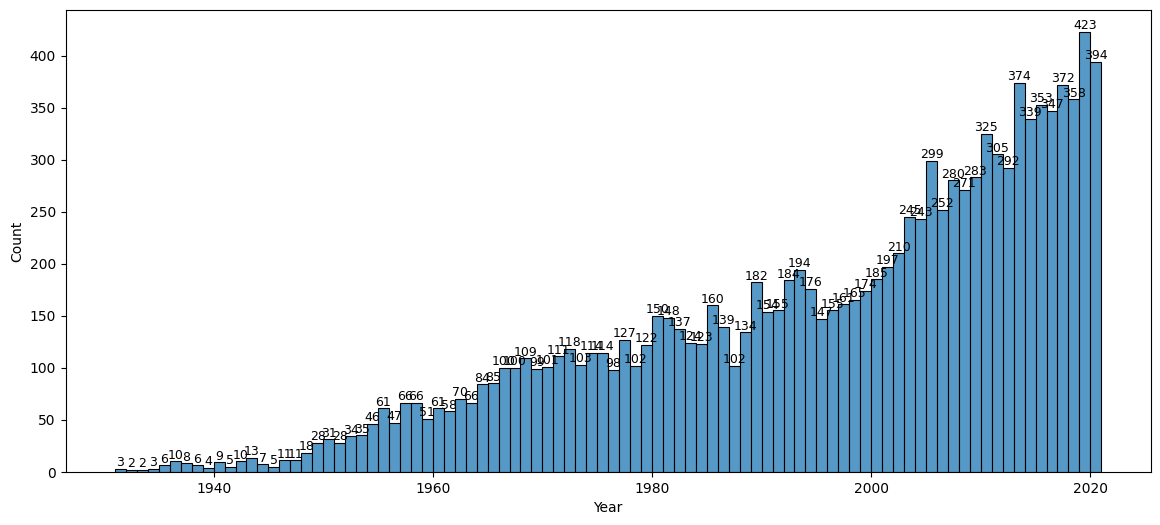

In [37]:
plt.figure(figsize=(14, 6))
ax = sns.histplot(data, x=data['Year'], bins=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=9)

plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**7. Movies Production Over Time:**
   - Most Movies Produced `(2015-2020)`, with 2019 being the Peak Year.
   - Fewest Movies Produced `(1931-1950)`

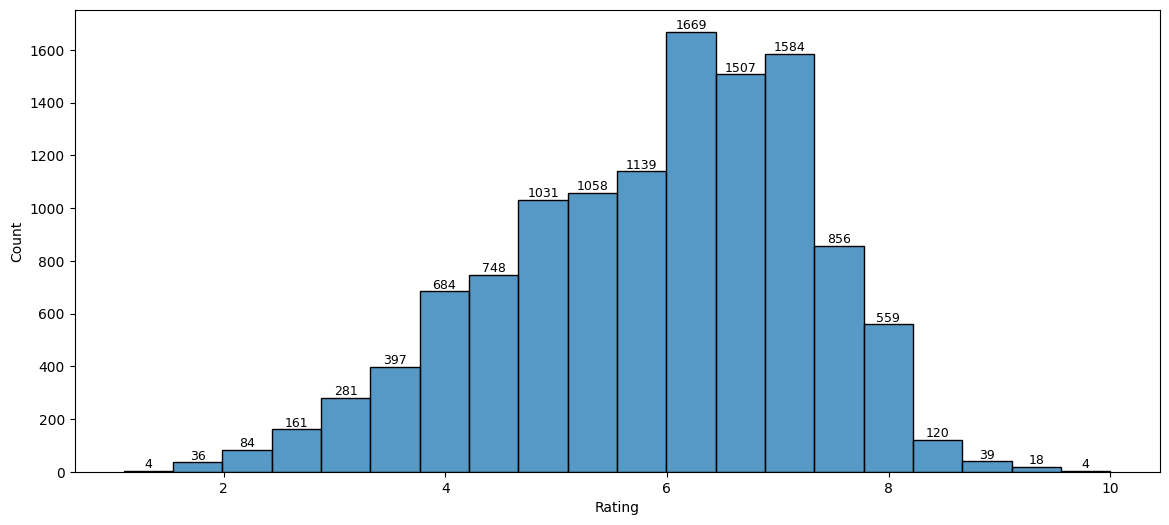

In [38]:
plt.figure(figsize=(14, 6))
ax = sns.histplot(data, x=data['Rating'], bins=20)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=9)

plt.show()

**8. Rating Distribution:**
   - Most Movies Fall in the Rating Range `6 to 7`.
   - Fewest Movies Have `Rating < 2` or `Rating > 9`.

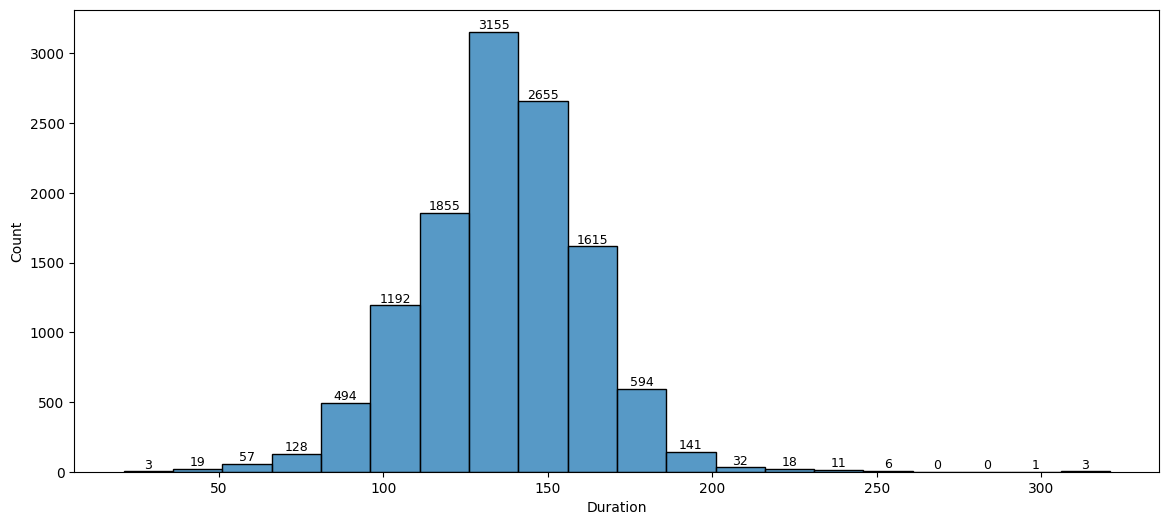

In [39]:
plt.figure(figsize=(14, 6))
ax = sns.histplot(data, x=data['Duration'], bins=20)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=9)

plt.show()

**9. Duration of Movies:**
   - Majority of Movies Have a Duration between `120 and 150 Minutes`.
   - Fewest Movies Have `Durations < 50` or `Durations > 200`.

In [40]:
genre_counts = data['Genre'].value_counts()
(genre_counts / genre_counts.sum()) * 100

Drama          31.688789
Action         14.074631
Romance        11.520160
Comedy         11.219634
Crime           7.304449
Thriller        5.668253
Family          3.472744
Musical         3.439352
Mystery         2.537774
Adventure       2.312380
Horror          1.686284
Fantasy         1.218800
Biography       0.960013
History         0.826446
Music           0.442441
Documentary     0.400701
Sport           0.333918
Animation       0.333918
War             0.275482
Sci-Fi          0.267134
News            0.008348
Western         0.008348
Name: Genre, dtype: float64

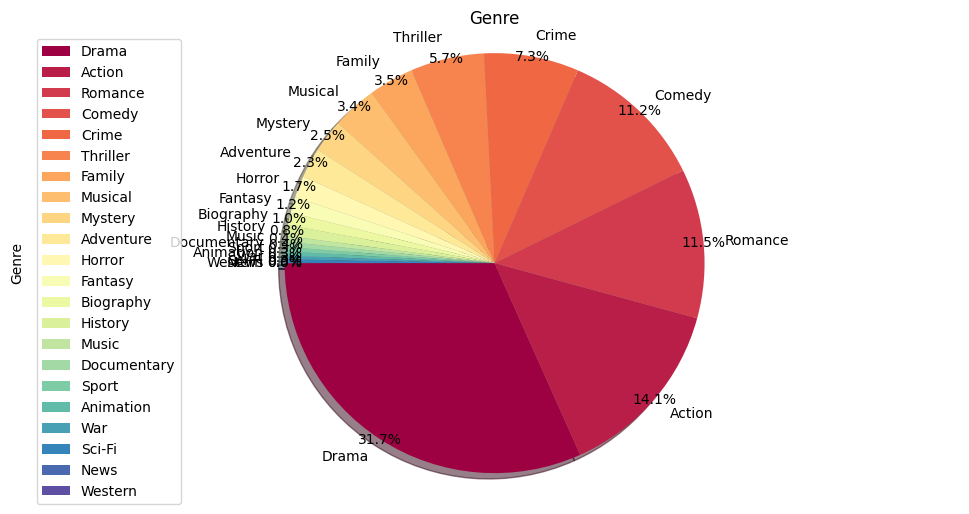

In [41]:
genre_counts.plot(kind='pie', figsize=(12, 6), shadow=True, startangle=180, autopct='%1.1f%%', pctdistance=1, cmap=cm.get_cmap('Spectral'))
plt.title('Genre')
plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

**10. Genre Popularity:**
   - Most Prevalent Movie Genres: `Drama (32%), Action (14%), Romance (12%)`
   - Least Prevalent Movie Genres: `Western (0.1%), News (0.1%), Sci-Fi (0.2%)`

In [42]:
average_votes_by_year = data.groupby('Year')['Votes'].mean().reset_index()
average_votes_by_year

,Year,Votes
0,1931,76.666667
1,1932,12.000000
2,1933,12.000000
3,1934,9.333333
4,1935,18.500000
...,...,...
86,2017,3392.255376
87,2018,6280.921788
88,2019,3602.952719
89,2020,7166.842491


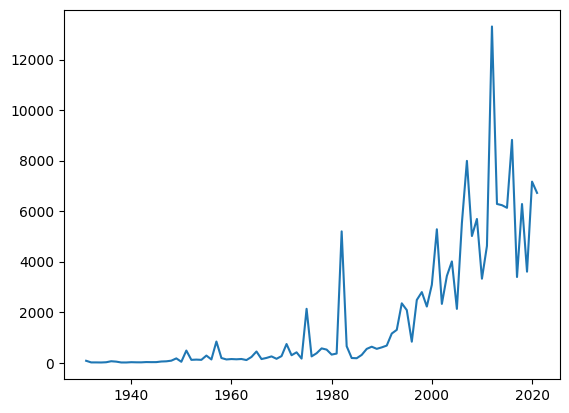

In [43]:
plt.plot(average_votes_by_year['Year'], average_votes_by_year['Votes'])

In [44]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi He thought he was Gandhi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,ZulmOSitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


# **Encoding Categorical Features to Numeric Labels**

In [45]:
data['Genre'] = data['Genre'].astype('category').cat.codes
data['Director'] = data['Director'].astype('category').cat.codes
data['Actor 1'] = data['Actor 1'].astype('category').cat.codes
data['Actor 2'] = data['Actor 2'].astype('category').cat.codes
data['Actor 3'] = data['Actor 3'].astype('category').cat.codes

In [46]:
data.drop('Name', axis=1, inplace=True)

In [47]:
data.head(10)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,7,7.0,8,629,1352,2272,319
3,2019,110,4,4.4,35,1335,1198,719,2148
3,2019,110,16,4.4,35,1335,1198,719,2148
5,1997,147,4,4.7,827,1530,378,75,2045
5,1997,147,7,4.7,827,1530,378,75,2045
5,1997,147,13,4.7,827,1530,378,75,2045
6,2005,142,7,7.4,1086,2044,692,1112,2524
6,2005,142,16,7.4,1086,2044,692,1112,2524
6,2005,142,20,7.4,1086,2044,692,1112,2524
8,2012,82,11,5.6,326,135,1934,1175,1013


# **Defining Column Names for a DataFrame for `x` and `y`**

In [48]:
columns = ['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# **Scaling specified columns using `MinMaxScaler()`**

In [49]:
min_max_scaler = MinMaxScaler()
data[columns] = min_max_scaler.fit_transform(data[columns])
data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,0.977778,0.293333,0.333333,0.662921,0.000005,0.258848,0.690148,0.979310,0.124853
3,0.977778,0.296667,0.190476,0.370787,0.000051,0.549383,0.611536,0.309914,0.840705
3,0.977778,0.296667,0.761905,0.370787,0.000051,0.549383,0.611536,0.309914,0.840705
5,0.733333,0.420000,0.190476,0.404494,0.001390,0.629630,0.192956,0.032328,0.800391
5,0.733333,0.420000,0.333333,0.404494,0.001390,0.629630,0.192956,0.032328,0.800391
...,...,...,...,...,...,...,...,...,...
15503,0.644444,0.346667,0.333333,0.528090,0.000066,0.737860,0.207249,0.325000,0.659491
15505,0.755556,0.360000,0.000000,0.382022,0.001099,0.421811,0.057172,0.932759,0.122896
15505,0.755556,0.360000,0.333333,0.382022,0.001099,0.421811,0.057172,0.932759,0.122896
15508,0.744444,0.363333,0.000000,0.573034,0.000025,0.368313,0.238897,0.324569,0.118591


In [50]:
x = data.drop('Rating', axis=1)
y = data['Rating']

# **Splitting the Dataset into Training and Testing Sets**

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=80)

In [52]:
x_train

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
7352,0.522222,0.463333,0.380952,0.000054,0.000000,0.209801,0.180603,0.651272
15005,0.488889,0.246667,0.000000,0.000156,0.586831,0.232772,0.996983,0.605088
3553,0.500000,0.490000,0.238095,0.000059,0.765432,0.810107,0.996983,0.680626
8549,0.600000,0.293333,0.000000,0.000019,0.910288,0.644717,0.468966,0.394521
3738,0.488889,0.473333,0.000000,0.000490,0.248560,0.618173,0.246983,0.302935
...,...,...,...,...,...,...,...,...
11182,0.833333,0.370000,0.761905,0.005128,0.758025,0.637060,0.437069,0.684149
2808,0.766667,0.396667,0.000000,0.000869,0.555967,0.334354,0.890948,0.607045
3747,0.211111,0.346667,0.476190,0.000019,0.406996,0.689638,0.274138,0.934638
6665,0.566667,0.386667,0.380952,0.000110,0.679424,0.701889,0.064224,0.645010


In [53]:
x_test

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1210,0.322222,0.506667,0.190476,0.000034,0.495062,0.404798,0.789224,0.531507
9023,0.688889,0.363333,0.333333,0.003510,0.403704,0.223583,0.243534,0.645010
14343,0.955556,0.466667,0.047619,0.043501,0.055144,0.751404,0.374138,0.104892
3961,0.922222,0.326667,0.000000,0.001659,0.769547,0.301174,0.277586,0.887671
3058,0.866667,0.313333,0.333333,0.000315,0.692593,0.709546,0.626293,0.411742
...,...,...,...,...,...,...,...,...
11101,0.466667,0.476667,0.619048,0.003233,0.528395,0.238897,0.996983,0.953816
4721,0.655556,0.430000,0.857143,0.001868,0.210288,0.232772,0.003879,0.250098
43,0.844444,0.383333,0.000000,0.003191,0.071193,0.464012,0.692672,0.216438
221,0.511111,0.423333,0.238095,0.000020,0.131276,0.545687,0.411638,0.346771


In [54]:
y_train

7352     0.741573
15005    0.674157
3553     0.606742
8549     0.595506
3738     0.629213
           ...   
11182    0.629213
2808     0.359551
3747     0.595506
6665     0.617978
1414     0.550562
Name: Rating, Length: 9583, dtype: float64

In [55]:
y_test

1210     0.640449
9023     0.483146
14343    0.539326
3961     0.460674
3058     0.550562
           ...   
11101    0.707865
4721     0.471910
43       0.786517
221      0.471910
439      0.584270
Name: Rating, Length: 2396, dtype: float64

# **Algorithms**

### **1. Linear Regression**

In [56]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

LinearRegression()

### **2. Random Forest Regressor**

In [57]:
random_forest_regressor_model = RandomForestRegressor()
random_forest_regressor_model.fit(x_train, y_train)

RandomForestRegressor()

### **3. Decision Tree Regressor**

In [58]:
decision_tree_regressor_model = DecisionTreeRegressor()
decision_tree_regressor_model.fit(x_train, y_train)

DecisionTreeRegressor()

### **4. Support Vector Regressor**

In [59]:
support_vector_regressor_model = SVR()
support_vector_regressor_model.fit(x_train, y_train)

SVR()

# **Predictions**

### **1. Linear Regression**

In [60]:
linear_regression_y_pred = linear_regression_model.predict(x_test)
linear_regression_y_pred

array([0.5987235 , 0.53972375, 0.50825744, ..., 0.50060103, 0.56018   ,
       0.62032081])

### **2. Random Forest Regressor**

In [61]:
random_forest_regressor_y_pred = random_forest_regressor_model.predict(x_test)
random_forest_regressor_y_pred

array([0.5858427 , 0.5105618 , 0.54269663, ..., 0.70977528, 0.48932584,
       0.58853933])

### **3. Decision Tree Regressor**

In [62]:
decision_tree_regressor_y_pred = decision_tree_regressor_model.predict(x_test)
decision_tree_regressor_y_pred

array([0.59550562, 0.48314607, 0.53932584, ..., 0.78651685, 0.47191011,
       0.58426966])

### **4. Support Vector Regressor**

In [63]:
support_vector_regressor_y_pred = support_vector_regressor_model.predict(x_test)
support_vector_regressor_y_pred

array([0.63629077, 0.49318975, 0.58993762, ..., 0.46209362, 0.58487429,
       0.6140807 ])

# **Metrics**

### **1. Linear Regression**

In [64]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, linear_regression_y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, linear_regression_y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, linear_regression_y_pred)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(y_test, linear_regression_y_pred))

Mean Absolute Error:  0.11622255488008916
Mean Squared Error:  0.020937836172965303
Root Mean Squared Error:  0.14469912291705608
Coefficient of Determination (R2 Score):  0.10809540238826632


### **2. Random Forest Regressor**

In [65]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, random_forest_regressor_y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, random_forest_regressor_y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, random_forest_regressor_y_pred)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(y_test, random_forest_regressor_y_pred))

Mean Absolute Error:  0.04838091575847388
Mean Squared Error:  0.005432348921813259
Root Mean Squared Error:  0.07370447016167513
Coefficient of Determination (R2 Score):  0.7685941880922549


### **3. Decision Tree Regressor**

In [66]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, decision_tree_regressor_y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, decision_tree_regressor_y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, decision_tree_regressor_y_pred)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(y_test, decision_tree_regressor_y_pred))

Mean Absolute Error:  0.051007296805537325
Mean Squared Error:  0.01193183985681645
Root Mean Squared Error:  0.10923296140275815
Coefficient of Determination (R2 Score):  0.49173053326291505


### **4. Support Vector Regressor**

In [67]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, support_vector_regressor_y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, support_vector_regressor_y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, support_vector_regressor_y_pred)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(y_test, support_vector_regressor_y_pred))

Mean Absolute Error:  0.10515493556775228
Mean Squared Error:  0.01815249300680883
Root Mean Squared Error:  0.13473118795144956
Coefficient of Determination (R2 Score):  0.22674473918215288


# **Objectives**

**1. Top Vote Receiver and Lowest Voted Movies:**
   - Movie with Most Votes: `Life of Pi`
   - Movies with the Fewest Votes: `Anmol Sitaare, Atal Faisla, Awesome Mausam`

**2. Highest and Lowest Rated Movies:**
   - Movie with the Highest Rating: `Love Qubool Hai`
   - Movie with the Lowest Rating: `Sadak`

**3. Directors' Movie Count:**
   - Directors with the Most Movies: `David Dhawan (103), Ram Gopal Varma (93), Mahesh Bhatt (87)`
   - Directors with the Fewest Movies: `Mozez Singh (1), Jitendra Chawda (1), K.C. Handra (1)`

**4. Actor 1's Movie Count:**
   - Actor 1 with the Most Movies: `Amitabh Bachchan (266), Akshay Kumar (213), Ashok Kumar (202)`
   - Actor 1 with the Fewest Movies: `Ajit Banerjee (1), Bharat Chawla (1), Amrityan (1)`

**5. Actor 2's Movie Count:**
   - Actor 2 with the Most Movies: `Rekha (112), Hema Malini (103), Akshay Kumar (93)`
   - Actor 2 with the Fewest Movies: `Baby Vijaya (1), Shibana Dutta (1), Ravi Khanvilkar (1)`

**6. Actor 3's Movie Count:**
   - Actor 3 with the Most Movies: `Pran (112), Anupam Kher (120), Paresh Rawal (70)`
   - Actor 3 with the Fewest Movies: `Shatakshi Gupta (1), Ranjeet Jha (1), Siddharth Chandekar (1)`

**7. Movies Production Over Time:**
   - Most Movies Produced `(2015-2020)`, with 2019 being the Peak Year.
   - Fewest Movies Produced `(1931-1950)`

**8. Rating Distribution:**
   - Most Movies Fall in the Rating Range `6 to 7`.
   - Fewest Movies Have `Rating < 2` or `Rating > 9`.

**9. Duration of Movies:**
   - Majority of Movies Have a Duration between `120 and 150 Minutes`.
   - Fewest Movies Have `Durations < 50` or `Durations > 200`.

**10. Genre Popularity:**
   - Most Prevalent Movie Genres: `Drama (32%), Action (14%), Romance (12%)`
   - Least Prevalent Movie Genres: `Western (0.1%), News (0.1%), Sci-Fi (0.2%)`